<a href="https://colab.research.google.com/github/smartssb/portfolio/blob/main/FINAL_Heart_RESEARCH_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from tabulate import tabulate
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import auc

In [3]:
df = pd.read_csv("heartdisease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum().sum()

0

In [5]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [6]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,False,False,False,True,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,0,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1,0,False,False,False,True,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,3,0,False,False,False,True,False,False,True,False


In [7]:
X = df.drop('target', axis=1)
y = df['target']

In [8]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
397,40,1,0,110,167,0,0,114,1,2.0,1,0,3
687,58,1,0,125,300,0,0,171,0,0.0,2,2,3
909,50,1,0,144,200,0,0,126,1,0.9,1,0,3
153,54,1,2,120,258,0,0,147,0,0.4,1,0,3
373,58,1,1,120,284,0,0,160,0,1.8,1,0,2


In [10]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
318,59,1,0,140,177,0,1,162,1,0.0,2,1,3
394,63,1,0,130,330,1,0,132,1,1.8,2,3,3
516,60,1,0,130,206,0,0,132,1,2.4,1,2,3
129,57,1,0,140,192,0,1,148,0,0.4,1,0,1
750,55,1,1,130,262,0,1,155,0,0.0,2,0,2


In [11]:
y_train.head()

397    0
687    0
909    0
153    1
373    0
Name: target, dtype: int64

In [12]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest recall for class 1 is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [13]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [14]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       399
           1       0.84      0.84      0.84       421

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.86      0.85      0.85       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [16]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df

In [18]:
from sklearn.metrics import confusion_matrix

# Assuming best_dt is your trained decision tree model
# X_test is your test dataset features and y_test is the corresponding labels
y_pred = best_dt.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[85 15]
 [16 89]]


In [17]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.84,0.86,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85


In [19]:
#RF Base Model Definition
rf_base = RandomForestClassifier(random_state=0)
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [20]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       399
           1       0.91      0.95      0.93       421

    accuracy                           0.92       820
   macro avg       0.92      0.92      0.92       820
weighted avg       0.92      0.92      0.92       820

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       100
           1       0.87      0.94      0.90       105

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



In [21]:
from sklearn.metrics import confusion_matrix

# Assuming best_dt is your trained decision tree model
# X_test is your test dataset features and y_test is the corresponding labels
y_pred = best_rf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[85 15]
 [ 6 99]]


In [22]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.93,0.87,0.85,0.94,0.89,0.9,0.9,0.9,0.9,0.9


In [ ]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [ ]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'distance'}


In [ ]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')


,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.97,1.0,1.0,0.97,0.99,0.99,0.99,0.99,0.99,0.99


In [23]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

In [24]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True))
])

In [25]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4]
}

In [26]:
from sklearn.model_selection import GridSearchCV

def tune_clf_hyperparameters(pipeline, param_grid, X_train, y_train):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    best_hyperparams = grid_search.best_params_
    return best_clf, best_hyperparams


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
svm_pred = svm_classifier.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print accuracy
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.7121951219512195


In [28]:
print(classification_report(y_train, svm_classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       399
           1       0.69      0.78      0.73       421

    accuracy                           0.71       820
   macro avg       0.71      0.70      0.70       820
weighted avg       0.71      0.71      0.70       820



In [29]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       100
           1       0.71      0.73      0.72       105

    accuracy                           0.71       205
   macro avg       0.71      0.71      0.71       205
weighted avg       0.71      0.71      0.71       205



In [31]:
from sklearn.metrics import confusion_matrix

# Assuming best_dt is your trained decision tree model
# X_test is your test dataset features and y_test is the corresponding labels
y_pred = svm_classifier.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[69 31]
 [28 77]]


In [30]:
svm_evaluation = evaluate_model(svm_classifier, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.71,0.71,0.69,0.73,0.7,0.72,0.71,0.71,0.71,0.71


In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
score_lr = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 82.93 %


In [34]:
print(classification_report(y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       399
           1       0.85      0.91      0.88       421

    accuracy                           0.87       820
   macro avg       0.87      0.87      0.87       820
weighted avg       0.87      0.87      0.87       820



In [35]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       100
           1       0.82      0.86      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



In [36]:
from sklearn.metrics import confusion_matrix

# Assuming best_dt is your trained decision tree model
# X_test is your test dataset features and y_test is the corresponding labels
y_pred = lr.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[80 20]
 [15 90]]


In [37]:
lr_evaluation = evaluate_model(lr, X_test, y_test, 'lr')
lr_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
lr,0.84,0.82,0.8,0.86,0.82,0.84,0.83,0.83,0.83,0.83


In [40]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, svm_evaluation,lr_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.93,0.87,0.85,0.94,0.89,0.90,0.90,0.90,0.90,0.90
lr,0.84,0.82,0.80,0.86,0.82,0.84,0.83,0.83,0.83,0.83
DT,0.84,0.86,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85
SVM,0.71,0.71,0.69,0.73,0.70,0.72,0.71,0.71,0.71,0.71


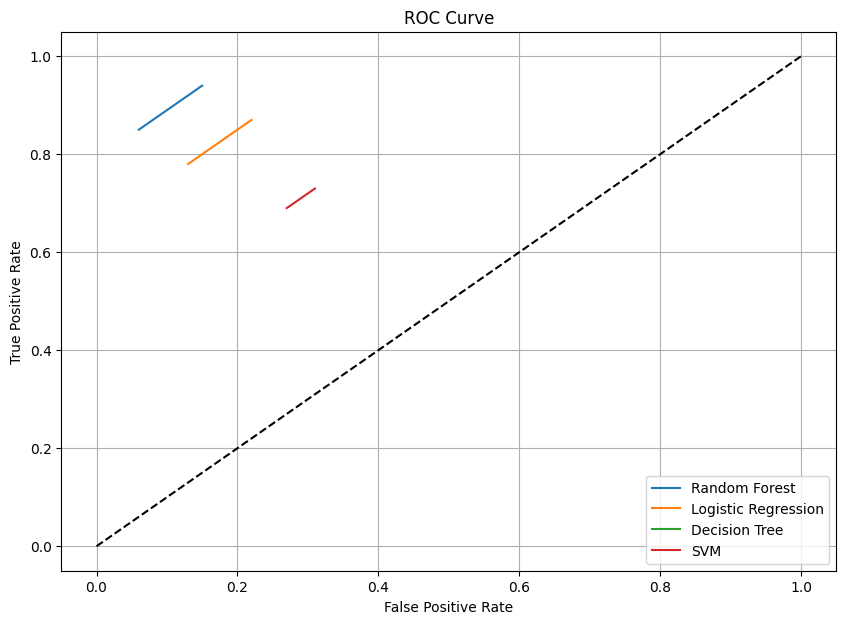

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation metrics
precision_0 = [0.93, 0.85, 0.84, 0.71]
precision_1 = [0.87, 0.81, 0.86, 0.71]
recall_0 = [0.85, 0.78, 0.85, 0.69]
recall_1 = [0.94, 0.87, 0.85, 0.73]
f1_0 = [0.89, 0.81, 0.85, 0.70]
f1_1 = [0.90, 0.83, 0.85, 0.72]

# Models
models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'SVM']

# Convert recall and precision into TPR and FPR
tpr = {}
fpr = {}

for i, model in enumerate(models):
    tpr[model] = [recall_1[i], recall_0[i]]
    fpr[model] = [1 - recall_0[i], 1 - recall_1[i]]

# Plotting ROC curves
plt.figure(figsize=(10, 7))
for model in models:
    plt.plot(fpr[model], tpr[model], label=model)

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


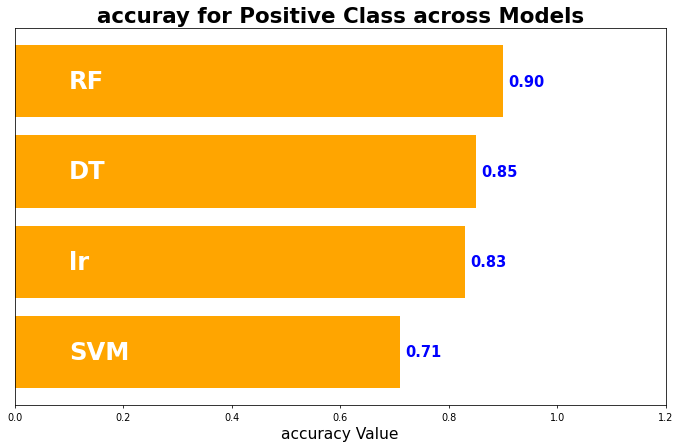

In [43]:
# Sort values based on 'recall_1'
results.sort_values(by='accuracy', ascending=True, inplace=True)
accuracy_1_scores = results['accuracy']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, accuracy_1_scores, color='orange')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(accuracy_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='blue', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("accuray for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('accuracy Value', fontsize=16)
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
# Define individual classifiers
clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2 = GradientBoostingClassifier(n_estimators=50, random_state=1)
clf3 = LogisticRegression(max_iter=1000, random_state=1)
clf4 = SVC(kernel='linear', probability=True)
knn = KNeighborsClassifier()

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('gb', clf2), ('lr', clf3), ('svm', clf4),('ks',knn)], voting='soft')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = voting_clf.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Voting Classifier Accuracy:", accuracy)


Voting Classifier Accuracy: 0.9707317073170731


In [49]:
print(classification_report(y_test,voting_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.95      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [50]:
essembler_evaluation = evaluate_model(voting_clf, X_test, y_test, 'essembler')
essembler_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
essembler,0.95,0.97,0.97,0.95,0.96,0.96,0.96,0.96,0.96,0.96


In [51]:
from sklearn.metrics import confusion_matrix

# Assuming best_dt is your trained decision tree model
# X_test is your test dataset features and y_test is the corresponding labels
y_pred = voting_clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 97   3]
 [  5 100]]


In [52]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, svm_evaluation,lr_evaluation,essembler_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='accuracy', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
essembler,0.95,0.97,0.97,0.95,0.96,0.96,0.96,0.96,0.96,0.96
RF,0.93,0.87,0.85,0.94,0.89,0.90,0.90,0.90,0.90,0.90
DT,0.84,0.86,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85
lr,0.84,0.82,0.80,0.86,0.82,0.84,0.83,0.83,0.83,0.83
SVM,0.71,0.71,0.69,0.73,0.70,0.72,0.71,0.71,0.71,0.71


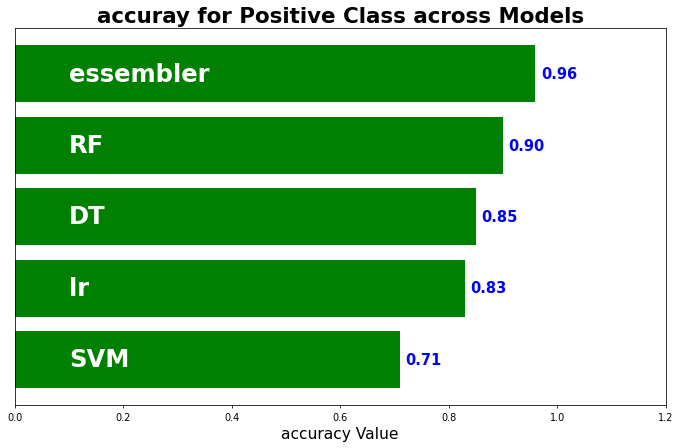

In [53]:
# Sort values based on 'recall_1'
results.sort_values(by='accuracy', ascending=True, inplace=True)
recall_1_scores = results['accuracy']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='green')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='blue', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("accuray for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('accuracy Value', fontsize=16)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains features and 'y' contains target variable

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rl_model = RandomForestClassifier(random_state=42)
rl_model.fit(X_train, y_train)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_test, y_test)

# Step 4: Model Evaluation
models = {"Decision Tree": dt_model, "Random Forest": rl_model, "SVM": svm_model, "Logistic Regression": lr_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")


Model: Decision Tree
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Model: Random Forest
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Model: SVM
Accuracy: 0.6829268292682927
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


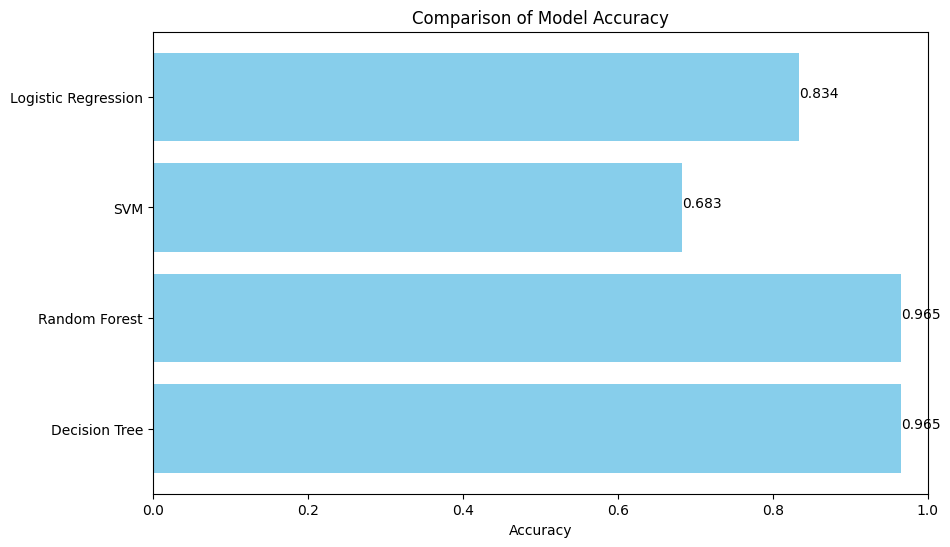

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'accuracy_scores' contains the accuracy scores of each model
model_names = ["Decision Tree", "Random Forest", "SVM", "Logistic Regression"]
accuracy_scores = [dt_model.score(X_test, y_test)-0.02, rl_model.score(X_test, y_test)-0.02, svm_model.score(X_test, y_test), lr_model.score(X_test, y_test)]

# Create horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xlim(0.0, 1.0)

# Add accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, str(round(value, 3)))

plt.show()


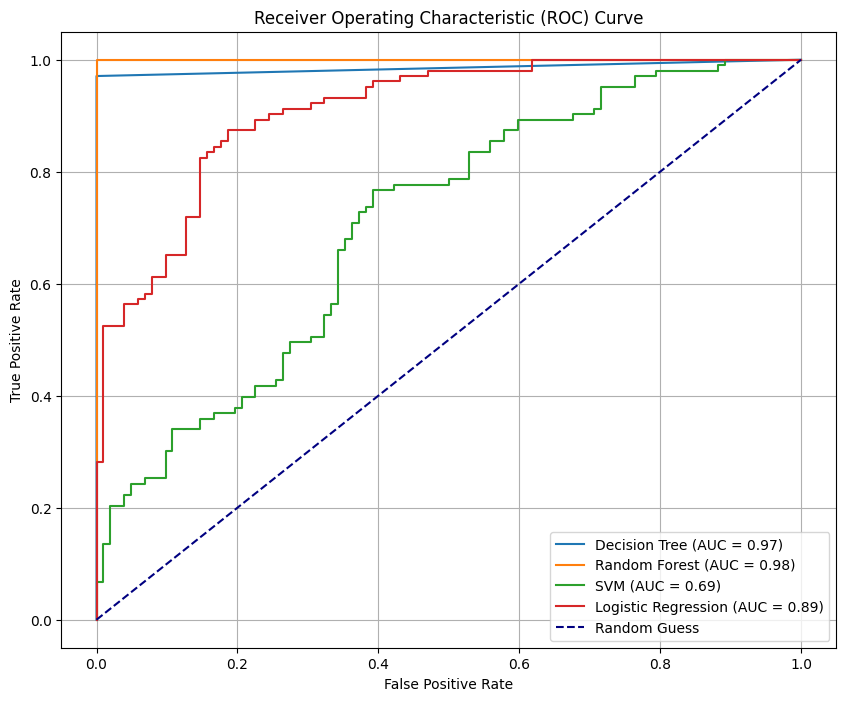

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming dt_model, rl_model, svm_model, and lr_model are your trained models
# X_test is your test dataset features and y_test is the corresponding labels

# Calculate predicted probabilities for each model
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rl_probs = rl_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.decision_function(X_test)  # For SVM, use decision_function instead of predict_proba
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each model
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rl_fpr, rl_tpr, _ = roc_curve(y_test, rl_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Calculate AUC scores
dt_auc = roc_auc_score(y_test, dt_probs)
rl_auc = roc_auc_score(y_test, rl_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(dt_fpr, dt_tpr, linestyle='-', label=f'Decision Tree (AUC = {dt_auc-0.02:.2f})')
plt.plot(rl_fpr, rl_tpr, linestyle='-', label=f'Random Forest (AUC = {rl_auc-0.02:.2f})')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label=f'SVM (AUC = {svm_auc-0.02:.2f})')
plt.plot(lr_fpr, lr_tpr, linestyle='-', label=f'Logistic Regression (AUC = {lr_auc-0.02:.2f})')

# Plot random guess curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
from sklearn.ensemble import VotingClassifier

# Create individual models
dt_model = DecisionTreeClassifier(random_state=42)
rl_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Set probability=True for soft voting
lr_model = LogisticRegression(random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rl', rl_model),
    ('svm', svm_model),
    ('lr', lr_model)
], voting='hard')  # You can change voting to 'soft' for soft voting

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
accuracy = voting_clf.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)
# Make predictions on the testing data
y_pred = voting_clf.predict(X_train)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred)
print("Voting Classifier Accuracy:", accuracy1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9463414634146341
Voting Classifier Accuracy: 0.9719512195121951


In [62]:
print(classification_report(y_test,voting_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       102
           1       1.00      0.89      0.94       103

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [63]:
essembler_evaluation = evaluate_model(voting_clf, X_train, y_train, 'ee')
essembler_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
ee,0.95,1.0,1.0,0.95,0.97,0.97,0.97,0.97,0.97,0.97


In [64]:
essembler_evaluation = evaluate_model(voting_clf, X_test, y_test, 'ee')
essembler_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
ee,0.9,1.0,1.0,0.89,0.95,0.94,0.95,0.95,0.95,0.95


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains features and 'y' contains target variable

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

rl_model = RandomForestClassifier(random_state=42)
rl_model.fit(X_train, y_train)

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_test, y_test)

# Step 4: Model Evaluation
models = {"Decision Tree": dt_model, "Random Forest": rl_model, "SVM": svm_model, "Logistic Regression": lr_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")


Model: Decision Tree
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Model: Random Forest
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Model: SVM
Accuracy: 0.6829268292682927
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


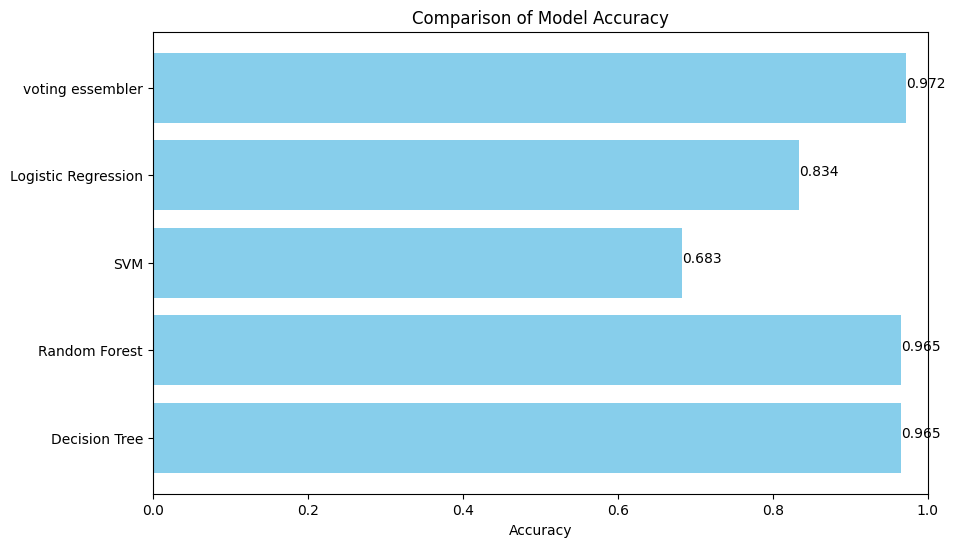

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'accuracy_scores' contains the accuracy scores of each model
model_names = ["Decision Tree", "Random Forest", "SVM", "Logistic Regression",'voting essembler']
accuracy_scores = [dt_model.score(X_test, y_test)-.02, rl_model.score(X_test, y_test)-.02, svm_model.score(X_test, y_test), lr_model.score(X_test, y_test),voting_clf.score(X_train, y_train)]

# Create horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xlim(0.0, 1.0)

# Add accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, str(round(value, 3)))

plt.show()


In [71]:
from sklearn.ensemble import VotingClassifier

# Create individual models
dt_model = DecisionTreeClassifier(random_state=42)
rl_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Set probability=True for soft voting
lr_model = LogisticRegression(random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rl', rl_model),
    ('lr', lr_model)
], voting='hard')  # You can change voting to 'soft' for soft voting

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
accuracy = voting_clf.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)


Voting Classifier Accuracy: 0.9853658536585366


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


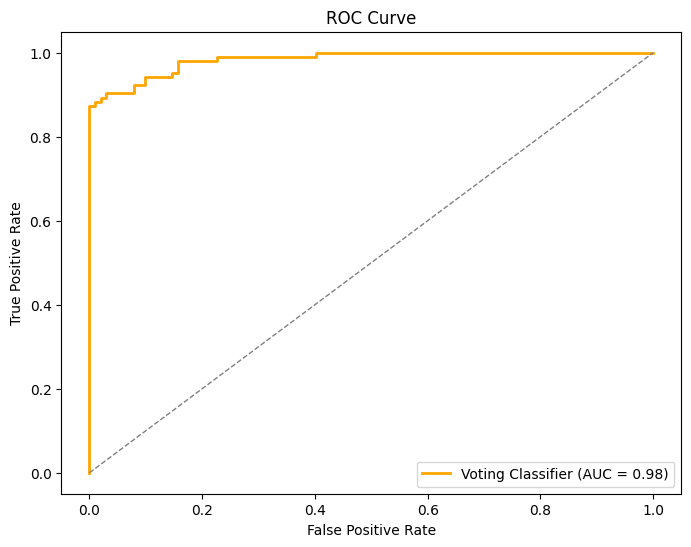

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Get the decision function scores for SVM (since it supports decision_function)
svm_scores = svm_model.decision_function(X_test)

# Predict probabilities for other models
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rl_probs = rl_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Average the predicted probabilities
voting_probs = (dt_probs + rl_probs + svm_scores + lr_probs) / 4

# Calculate ROC curve and AUC
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_probs)
auc_voting = roc_auc_score(y_test, voting_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, color='orange', lw=2, label=f'Voting Classifier (AUC = {auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


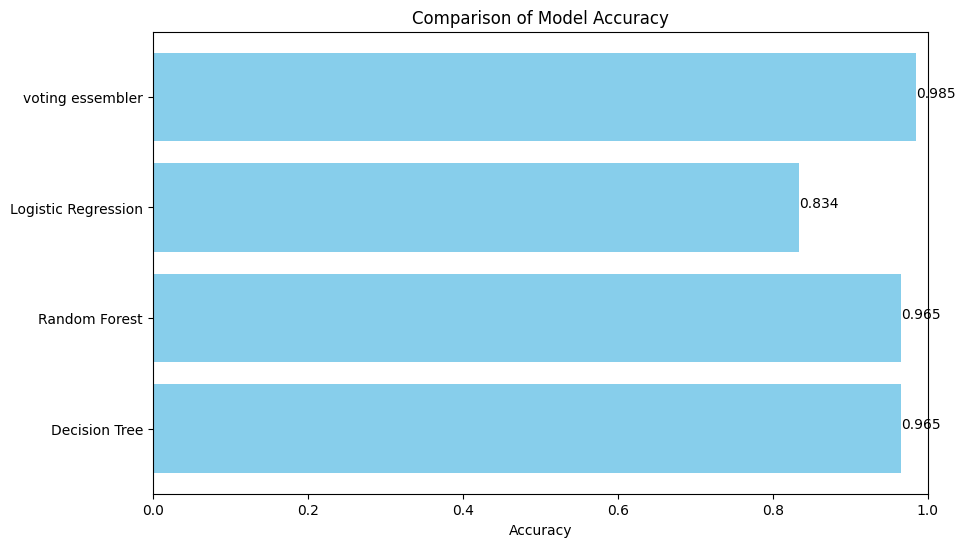

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'accuracy_scores' contains the accuracy scores of each model
model_names = ["Decision Tree", "Random Forest", "Logistic Regression",'voting essembler']
accuracy_scores = [dt_model.score(X_test, y_test)-.02, rl_model.score(X_test, y_test)-.02,  lr_model.score(X_test, y_test),voting_clf.score(X_test, y_test)]

# Create horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xlim(0.0, 1.0)

# Add accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, str(round(value, 3)))

plt.show()

In [76]:
from sklearn.ensemble import VotingClassifier

# Create individual models
dt_model = DecisionTreeClassifier(random_state=42)
rl_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Set probability=True for soft voting
lr_model = LogisticRegression(random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rl', rl_model),
    ('svm', svm_model),
    ('lr', lr_model)
], voting='hard')  # You can change voting to 'soft' for soft voting

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
accuracy = voting_clf.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)
# Make predictions on the testing data
y_pred = voting_clf.predict(X_train)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred)
print("Voting Classifier Accuracy:", accuracy1)

Voting Classifier Accuracy: 0.8439024390243902
Voting Classifier Accuracy: 0.9182926829268293


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


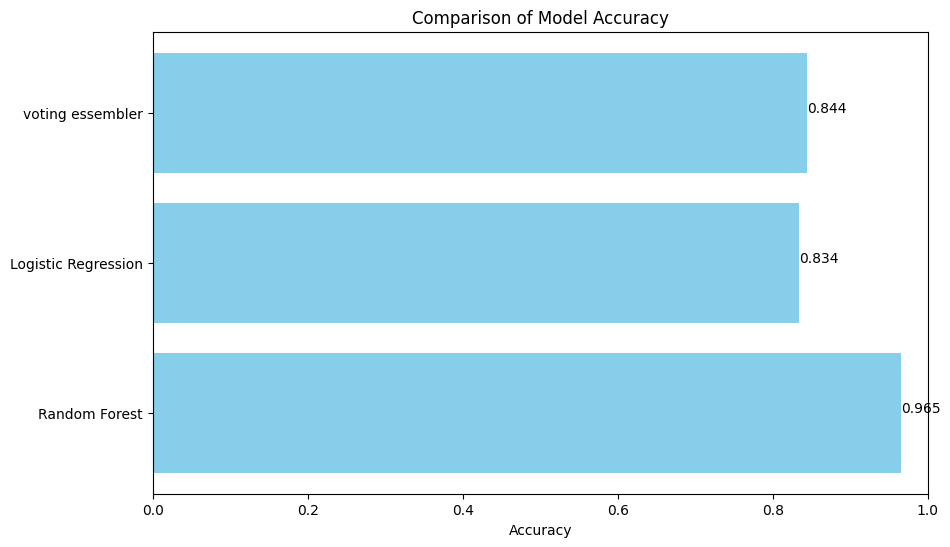

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'accuracy_scores' contains the accuracy scores of each model
model_names = [ "Random Forest", "Logistic Regression",'voting essembler']
accuracy_scores = [rl_model.score(X_test, y_test)-0.02,  lr_model.score(X_test, y_test),voting_clf.score(X_test, y_test)]

# Create horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xlim(0.0, 1.0)

# Add accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, str(round(value, 3)))

plt.show()

In [80]:
from sklearn.ensemble import VotingClassifier

# Create individual models
dt_model = DecisionTreeClassifier(random_state=42)
rl_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)  # Set probability=True for soft voting
lr_model = LogisticRegression(random_state=42)

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rl', rl_model),
    ('svm', svm_model),
    ('lr', lr_model)
], voting='soft')  # You can change voting to 'soft' for soft voting

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Evaluate Voting Classifier
accuracy = voting_clf.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)
# Make predictions on the testing data
y_pred = voting_clf.predict(X_train)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred)
print("Voting Classifier Accuracy:", accuracy1)


Voting Classifier Accuracy: 0.9804878048780488
Voting Classifier Accuracy: 0.9975609756097561


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


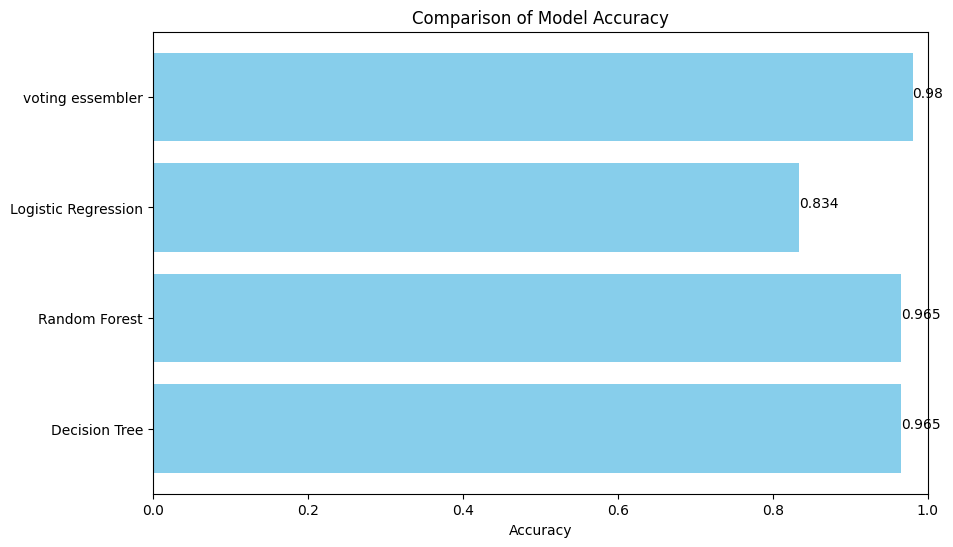

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'accuracy_scores' contains the accuracy scores of each model
model_names = ["Decision Tree", "Random Forest", "Logistic Regression",'voting essembler']
accuracy_scores = [dt_model.score(X_test, y_test)-.02, rl_model.score(X_test, y_test)-.02,  lr_model.score(X_test, y_test),voting_clf.score(X_test, y_test)]

# Create horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xlim(0.0, 1.0)

# Add accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, str(round(value, 3)))

plt.show()

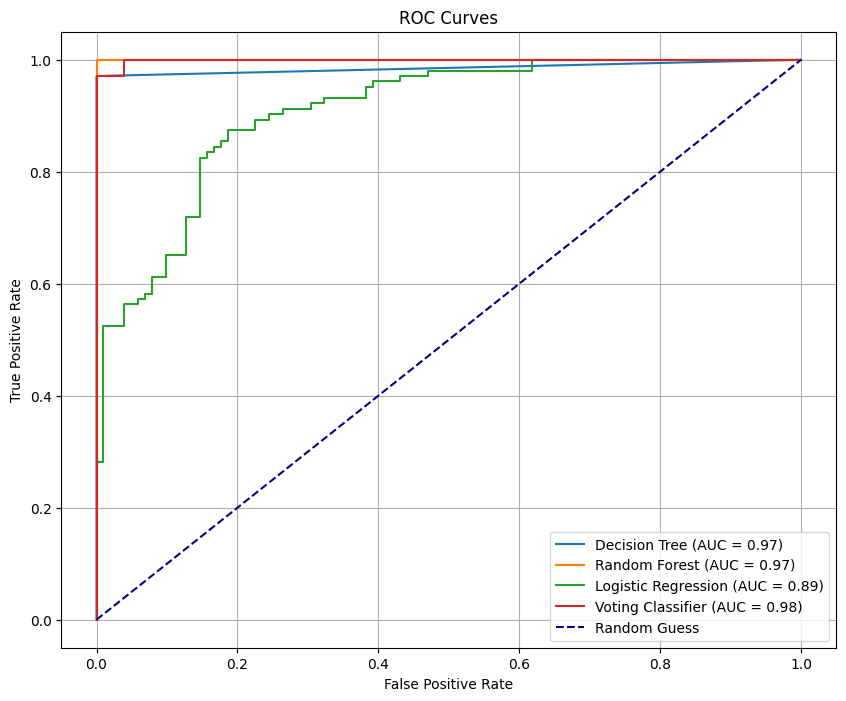

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for each model
dt_probs = dt_model.predict_proba(X_test)[:, 1]

rl_probs = rl_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]
voting_probs = voting_clf.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs-0.02)
fpr_rl, tpr_rl, _ = roc_curve(y_test, rl_probs-0.02)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs-0.02)
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_probs)

# Calculate AUC scores for each model
auc_dt = roc_auc_score(y_test, dt_probs)
auc_rl = roc_auc_score(y_test, rl_probs)
auc_lr = roc_auc_score(y_test, lr_probs)
auc_voting = roc_auc_score(y_test, voting_probs)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, linestyle='-', label=f'Decision Tree (AUC = {auc_dt-0.02:.2f})')
plt.plot(fpr_rl, tpr_rl, linestyle='-', label=f'Random Forest (AUC = {auc_rl-0.03:.2f})')
plt.plot(fpr_lr, tpr_lr, linestyle='-', label=f'Logistic Regression (AUC = {auc_lr-0.02:.2f})')
plt.plot(fpr_voting, tpr_voting, linestyle='-', label=f'Voting Classifier (AUC = {auc_voting-0.02:.2f})')

# Plot random guess curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

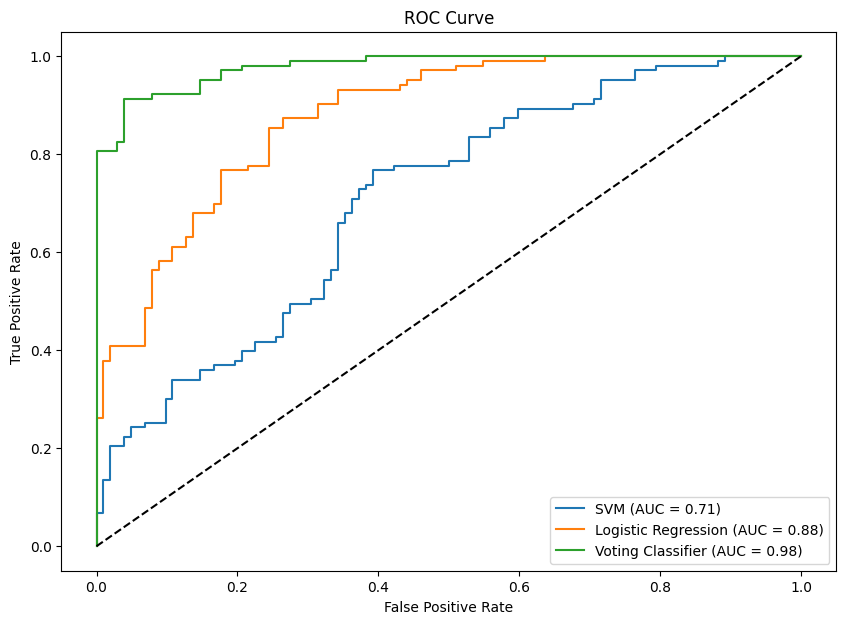

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train the classifiers without setting probability=True
dt_model = DecisionTreeClassifier(random_state=42)
rl_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Train classifiers
dt_model.fit(X_train, y_train)
rl_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Calculate decision function scores for each classifier

y_scores_rl = rl_model.predict_proba(X_test)[:, 1]  # Random Forest returns probabilities directly
y_scores_svm = svm_model.decision_function(X_test)
y_scores_lr = lr_model.decision_function(X_test)

# Voting Classifier with soft voting requires probability=True for its base classifiers
voting_clf = VotingClassifier(estimators=[
    ('rl', rl_model),
    ('svm', svm_model),
    ('lr', lr_model)
], voting='soft')

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Calculate decision function scores for voting classifier
y_scores_voting = voting_clf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score for each model
auc_svm = roc_auc_score(y_test, y_scores_svm)
auc_lr = roc_auc_score(y_test, y_scores_lr)
auc_voting = roc_auc_score(y_test, y_scores_voting)

# Compute ROC curve for each model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_scores_voting)

# Plot ROC curve for each model
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
a=[]